<a href="https://colab.research.google.com/github/anapowarchuk/processamento-de-imagens/blob/main/Aula_5_e_6_Filtragem_Espacial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Material elaborado por Ana Xavier, durante as aulas de Processamento Digitais de Imagens, ministradas pela Professora Dra. Carla Diniz L. Becker, para o curso de Informática Biomédica da Universidade Federal de Ciências da Saúde de Porto Alegre. - Feito no Google Colab

# **Aula 5 e 6 - Filtragem Espacial**
### 09/12/2021 [Síncrona] e 16/12/2021 [Assíncrona]

In [ ]:
pip install opencv-python

## Importando *bibliotecas*

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

## Criando a mesma imagem que o Gonzales

In [ ]:
img = np.zeros((5,5)) #criando imagem com 25 pixels
mask = np.array([(1, 2, 3), (4, 5, 6), (7, 8 ,9)]) #mascara
img[(2,2)] = 1 #posicionando 1 no centro da mascara

In [ ]:
print(img)
print(mask)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


## Correlação

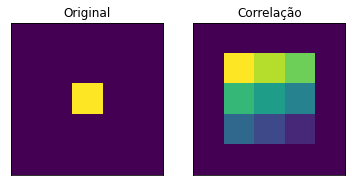

In [ ]:
kernel = mask

img=np.array(img)
dst = cv2.filter2D(img,-1,kernel) # FILTER2D - calcula a CORRELACAO: -1 é o "ddepth", DataType de cada elemento da imagem, ou seja, a exatidão para representar
#cadacada pixel. Quanto mais bits por pixel, melhor o contraste na imagem.

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Correlação')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
print(img)
print(dst)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 9. 8. 7. 0.]
 [0. 6. 5. 4. 0.]
 [0. 3. 2. 1. 0.]
 [0. 0. 0. 0. 0.]]


In [ ]:
img.dtype

dtype('float64')

In [ ]:
dst.dtype

dtype('float64')

## Lena

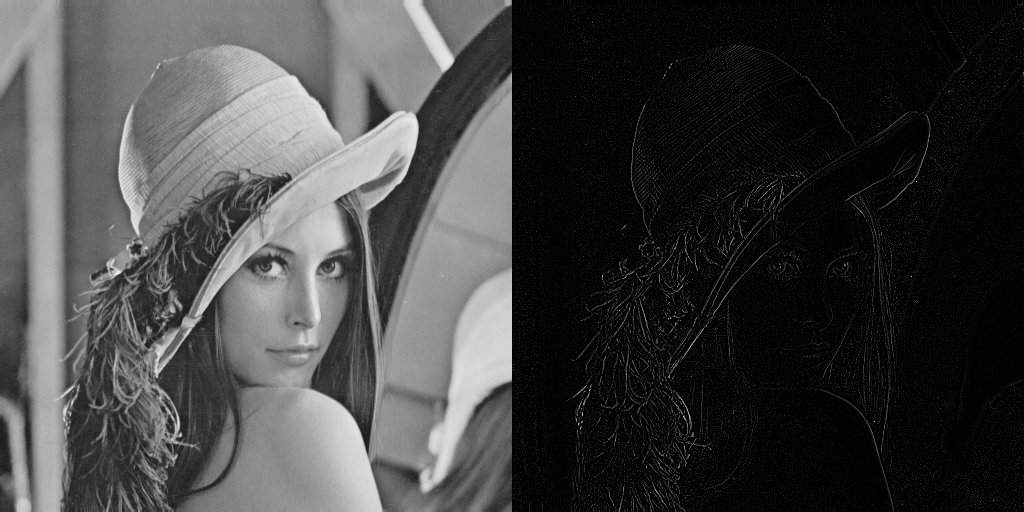

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

img = cv2.imread('lena.png')
img_ = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converte P&B

kernel = np.array([[0.0, -1.0, 0.0], 
                   [-1.0, 4.0, -1.0],
                   [0.0, -1.0, 0.0]])
#multiplicacao - 0


#filter the source image
img_f = cv2.filter2D(img_,-1,kernel)

h_img = cv2.hconcat([img_, img_f]) #hconcat - mostra a imagem uma do lado da outra na horiziontal
cv2_imshow(h_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Linhas em branco - bordas da lena - regiões abruptas de pixels

todas as regiões onde os pixels são muito próximos em termos de intensidade, a mascara joga esses valores para 0 ou próximo de 0

## **Aguçamento**

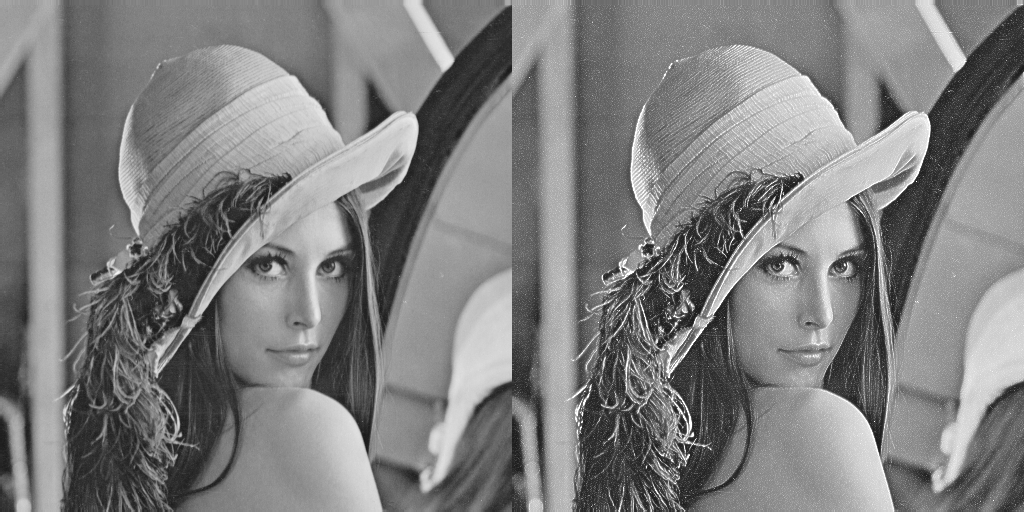

In [ ]:
#AGUÇAMENTO:

agucamento=cv2.add(img_,img_f) #https://docs.opencv.org/3.4/d0/d86/tutorial_py_image_arithmetics.html

h_img = cv2.hconcat([img_, agucamento])
cv2_imshow(h_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Aguçamento - TEXTURA

In [14]:
print (img_f)

[[ 0  0  1 ... 14 12  0]
 [ 0  0  1 ... 14 12  0]
 [ 0  0  1 ... 14 12  0]
 ...
 [ 0  0  5 ... 10  0  0]
 [ 1  0 20 ...  3  3 16]
 [ 0  0 15 ...  3  0  6]]


In [15]:
im1 = np.array([[200,200,200],[200,200,200],[200,200,200]])

kernel = np.array ([[]])